In [1]:
## importing libraries
import random

## initializing variables
cityList = [0,1,2,3,4]
populationSize = 10
generationNumber = 10

distanceMatrix = [
    [0, 792, 2448, 1631, 1092],
    [792, 0, 2015, 1084, 1372],
    [2448, 2015, 0, 1373, 2339],
    [1631, 1084, 1373, 0, 968],
    [1092, 1372, 2339, 968, 0]
]
## step 1 : define the function for creating genomes

def genome_creation(cityList):
    genome = cityList.copy()
    random.shuffle(genome)
    print('genome creations: ', genome)
    return genome

##  step 2 : define the function for fitness evaluation

def fitness_eval(genome, distanceMatrix ):
    distanceSum = 0
    for i in range(len(genome) - 1):
        distanceSum += distanceMatrix[genome[i]][genome[i+1]] ## dist(AB+BC+CD)
    distanceSum += distanceMatrix[genome[0]][genome[-1]] ## dist(AD)
    ## must evaluate for wrap-around distance dist(AB+BC+CD) + dist(AD) TS needs to wrap-around or "create a closed path"
    print('distance sum is: ', distanceSum)

    return distanceSum

## step 3 : defining the mutation function

def mutate(genome): ## takes two random genomes and shuffles them
    i, j = random.sample(range(len(genome)), 2)
    genome[i], genome[j] = genome[j], genome[i]


## step 4: define the main genome algo function

def genome_algo(cityList, distanceMatrix,populationSize, generationNumber):
    population = [genome_creation(cityList) for _ in range(populationSize)]

    ## for each generation we sort the best genomes inside of the population and create a new population with just the best genomes

    for _ in range(generationNumber):
        population.sort(key = lambda genome: fitness_eval(genome, distanceMatrix))
    newPopulation = population[:populationSize//2] ## list splicing syntax colon signifies the starting position

    ## we then select two random parents and breed them to create a better genome (child) repeat for half of population size
    for _ in range(populationSize//2):
        parent1, parent2 = random.choices(population[:populationSize//2], k = 2)
        child = parent1.copy()
    ## randomly select if we want to alter the child for potential better results
        if random.random() <.5:
            mutate(child)
        newPopulation.append(child)

    population = newPopulation
    bestSolution = min(population, key = lambda genome: fitness_eval(genome,distanceMatrix))

    return bestSolution


bestSolution = genome_algo(cityList, distanceMatrix, populationSize, generationNumber)

print('best solution found: ', bestSolution)
print('shortest path distance: ', fitness_eval(bestSolution,distanceMatrix))

genome creations:  [4, 3, 2, 0, 1]
genome creations:  [0, 4, 3, 1, 2]
genome creations:  [3, 4, 0, 2, 1]
genome creations:  [4, 3, 1, 2, 0]
genome creations:  [0, 1, 4, 3, 2]
genome creations:  [2, 3, 1, 4, 0]
genome creations:  [2, 0, 4, 3, 1]
genome creations:  [0, 2, 4, 1, 3]
genome creations:  [2, 3, 1, 0, 4]
genome creations:  [0, 1, 3, 2, 4]
distance sum is:  6953
distance sum is:  7607
distance sum is:  7607
distance sum is:  7607
distance sum is:  6953
distance sum is:  7369
distance sum is:  7607
distance sum is:  8874
distance sum is:  6680
distance sum is:  6680
distance sum is:  6680
distance sum is:  6680
distance sum is:  6953
distance sum is:  6953
distance sum is:  7369
distance sum is:  7607
distance sum is:  7607
distance sum is:  7607
distance sum is:  7607
distance sum is:  8874
distance sum is:  6680
distance sum is:  6680
distance sum is:  6953
distance sum is:  6953
distance sum is:  7369
distance sum is:  7607
distance sum is:  7607
distance sum is:  7607
distan

Shortest path found by genetic algorithm: [2, 1, 0, 4, 3, 2]
Total distance of the shortest path:  6240


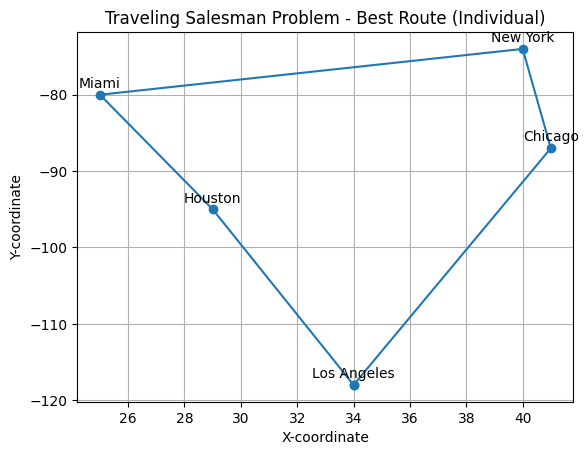

In [1]:
import random

# Function to create an individual (route) from a list of cities (genes)
def create_individual(city_list):
    individual = city_list.copy()
    random.shuffle(individual)
    individual.append(individual[0])  # Add the starting point to the end of the route for visualization
    return individual

# Function to evaluate the fitness of an individual (route)
def evaluate_fitness(individual, distance_matrix):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    total_distance += distance_matrix[individual[-1]][individual[0]]  # Distance from the last city to the first
    return total_distance

# Function for mutating an individual (swap two randomly selected cities/genes in the individual)
def mutate(individual):
    i, j = random.sample(range(len(individual)), 2)
    individual[i], individual[j] = individual[j], individual[i]

# Genetic algorithm to solve the traveling salesman problem
def genetic_algorithm(city_list, distance_matrix, population_size, generations):
    population = [create_individual(city_list) for _ in range(population_size)]

    for _ in range(generations):
        population.sort(key=lambda individual: evaluate_fitness(individual, distance_matrix))

        new_population = population[:population_size // 2]

        for _ in range(population_size // 2):
            parent1, parent2 = random.choices(population[:population_size // 2], k=2)
            child = parent1.copy()

            if random.random() < 0.5:
                mutate(child)
            new_population.append(child)

        population = new_population

    best_solution = min(population, key=lambda individual: evaluate_fitness(individual, distance_matrix))
    return best_solution

# City names
city_list = [0, 1, 2, 3, 4]

# Distance matrix between cities
distance_matrix = [
    [0, 792, 2448, 1631, 1092],
    [792, 0, 2015, 1084, 1372],
    [2448, 2015, 0, 1373, 2339],
    [1631, 1084, 1373, 0, 968],
    [1092, 1372, 2339, 968, 0]
]

# Set population size and number of generations
population_size = 100
generations = 100

# Run the genetic algorithm
best_solution = genetic_algorithm(city_list, distance_matrix, population_size, generations)

# Print the results
print("Shortest path found by genetic algorithm:", best_solution)
print("Total distance of the shortest path: ", evaluate_fitness(best_solution, distance_matrix))

# Visualization

import matplotlib.pyplot as plt

# Function to display the route
def show_route(route, x, y):
    x_route = [x[city] for city in route]
    y_route = [y[city] for city in route]
    plt.plot(x_route, y_route, marker='o')

# City names
city_names = ["New York", "Chicago", "Los Angeles", "Houston", "Miami"]

# Coordinates of cities
x = [40, 41, 34, 29, 25]  # x-coordinates of cities
y = [-74, -87, -118, -95, -80]  # y-coordinates of cities

# Display the best route
show_route(best_solution, x, y)

# Add city names above the points
for i, city in enumerate(city_names):
    plt.annotate(city, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Traveling Salesman Problem - Best Route (Individual)")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid(True)
plt.show()
